In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, log_loss, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize
import math
from sklearn.linear_model import LinearRegression
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Data 3450 Project
# What does demographics tell our health?

At the beginning we take a look to the data.

In [41]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [42]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [44]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [45]:
def bigGraph(df_in, columnName, hist_round, pmf_round):
        data = pd.Series(df_in[columnName])    
        hist = thinkstats2.Hist(round(data,hist_round))   
        pmf = thinkstats2.Pmf(round(data,pmf_round))    
        cdf = thinkstats2.Cdf(data)    
        pdf = thinkstats2.EstimatedPdf(data)    
        thinkplot.PrePlot(6, rows =2, cols=3)    
        thinkplot.SubPlot(1, title="Hist")    
        thinkplot.Hist(hist)    
        thinkplot.SubPlot(2, title="PMF")    
        thinkplot.Pmf(pmf)    
        thinkplot.SubPlot(3, title="CDF")    
        thinkplot.Cdf(cdf)    
        thinkplot.SubPlot(4, title="Prob Plot")   
        thinkstats2.NormalProbabilityPlot(data)    
        thinkplot.SubPlot(5, title="Log PP")    
        thinkstats2.NormalProbabilityPlot(np.log(data))    
        thinkplot.SubPlot(6, title="PDF")
        thinkplot.Pdf(pdf)
        thinkplot.Config()
        return

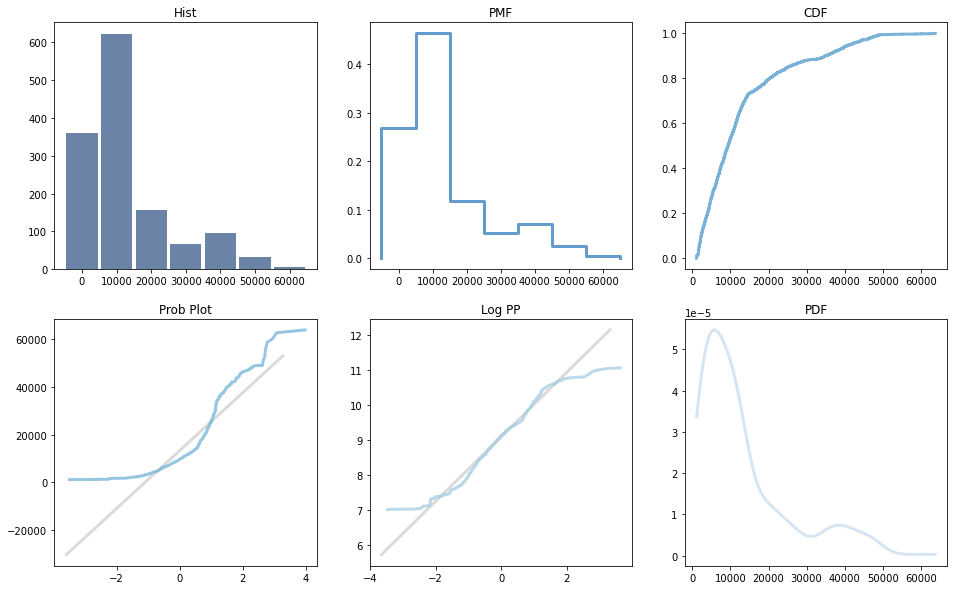

In [46]:
bigGraph(df, 'charges', -4 , -4)

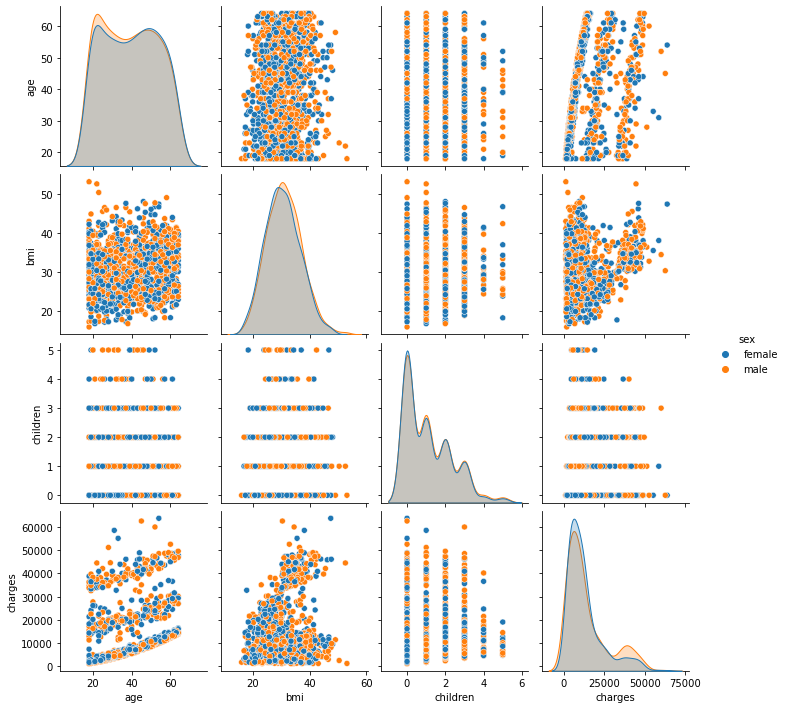

In [47]:
sns.pairplot(df, hue="sex")

In [48]:
#change data type
df[["smoker", "children"]] = df[["smoker", "children"]].astype("category")

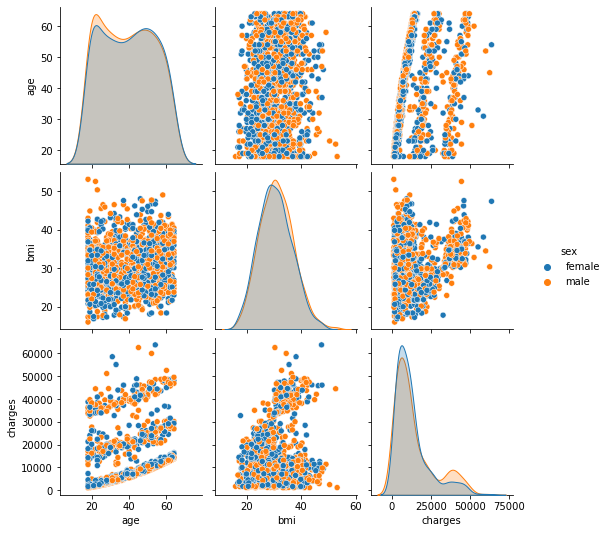

In [49]:
sns.pairplot(df, hue="sex")

We can the charges as our indicator for health.  The charges of the insurance is based on the sharing of the risk of death by a large group of people. Rate cab vary depending on the grup's risk. With group policies, such as the ones provided through employers, the carrier has already  taken into consideration the risks associated with the group and calculated a rate for that group.
Some common risk factors include: Age, Gender, Occupation, Location, smoker or not etc.
Therefore, the lower the insurance charges the people will be lower rick or more healthier.

In [50]:
#dfF = df[df["sex"] == "female"]
#dfM = df[df["sex"] == "male"]

In [51]:
df2 = pd.get_dummies(df, drop_first=True)

In [52]:
df2Y = df2["charges"]
df2X = df2.drop(columns={"charges"})
y = np.array(df2Y).reshape(-1,1)
x = np.array(df2X)
x.shape, y.shape

((1338, 12), (1338, 1))

In [53]:
xTrain, xTest, yTrain, yTest = train_test_split(x,y,test_size=.3)
model = LinearRegression().fit(xTrain,yTrain)
r_sq = model.score(xTest, yTest)
print('R-squared:', r_sq)

R-squared: 0.7396755967760792


In [54]:
tmp = model.predict(xTest)
mean_squared_error(tmp, yTest, squared=False)

6521.179822948668